In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

In [3]:
output_data = "../Resources/Project1Data.csv"
output_data2 = "../Resources/2018SASB.csv"
data_df = pd.read_csv(output_data)
data2_df = pd.read_csv(output_data2)
data_df

,SCL_UNITID,SCL_NAME,SPORT_CODE,SPORT_NAME,SCL_HBCU,SCL_PRIVATE,APR_RATE_2019_1000,ELIG_RATE_2019,RET_RATE_2019,NUM_OF_ATHLETES_2019,...,RET_RATE_2006,NUM_OF_ATHLETES_2006,APR_RATE_2005_1000,ELIG_RATE_2005,RET_RATE_2005,NUM_OF_ATHLETES_2005,APR_RATE_2004_1000,ELIG_RATE_2004,RET_RATE_2004,NUM_OF_ATHLETES_2004
0,100654,Alabama A&M University,1,Baseball,Y,N,947.0,0.947368,0.945946,19.0,...,0.948718,21.0,917.0,0.880952,0.952381,21.0,975.0,0.97500,0.975000,20.0
1,100654,Alabama A&M University,2,Men's Basketball,Y,N,867.0,0.875000,0.857143,13.0,...,0.846154,13.0,909.0,0.909091,0.909091,11.0,950.0,0.95000,0.950000,10.0
2,100654,Alabama A&M University,4,Football,Y,N,900.0,0.889655,0.909722,78.0,...,0.962963,70.0,921.0,0.875862,0.965517,74.0,871.0,0.86014,0.881119,74.0
3,100654,Alabama A&M University,6,Men's Golf,Y,N,962.0,1.000000,0.923077,7.0,...,0.888889,5.0,929.0,0.857143,1.000000,7.0,NaN,NaN,NaN,NaN
4,100654,Alabama A&M University,13,Men's Tennis,Y,N,1000.0,1.000000,1.000000,7.0,...,0.888889,5.0,1000.0,1.000000,1.000000,4.0,958.0,1.00000,0.916667,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6012,486840,Kennesaw State University,28,Women's Softball,N,N,1000.0,1.000000,1.000000,24.0,...,0.916667,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6013,486840,Kennesaw State University,30,Women's Soccer,N,N,1000.0,1.000000,1.000000,29.0,...,0.973684,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6014,486840,Kennesaw State University,33,Women's Tennis,N,N,1000.0,1.000000,1.000000,9.0,...,0.933333,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6015,486840,Kennesaw State University,34,"Women's Track, Cross Country",N,N,1000.0,1.000000,1.000000,32.0,...,0.941176,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data_df["SCL_NAME"].nunique()

385

In [5]:
# APR scores over time
combined_years_df = data_df[["SPORT_NAME", "APR_RATE_2019_1000", "APR_RATE_2018_1000", "APR_RATE_2017_1000"]]
combined_years_df

combined_years_df["SPORT_NAME"].nunique()



37

In [6]:
# Create grouped dataframe by sport 
mean = combined_years_df['APR_RATE_2019_1000'].groupby(combined_years_df['SPORT_NAME']).mean()
mean_df = mean_df.reset_index()
mean_df = pd.DataFrame({"APR_RATE_2019_1000": mean})
mean_df

# Graph sport vs average APR score
sport_names = mean_df.index.tolist()
x_axis = sport_names
y_axis = mean_df["APR_RATE_2019_1000"]

plt.figure(figsize = (10,5))
plt.bar(x_axis,y_axis)
plt.xticks(x_axis,rotation="vertical")

# Labels
plt.ylabel("Average Rate")
plt.title("2019 Average Academic Performance Rate by Division 1 Sport")
plt.ylim(950,1000)

plt.savefig("../Images/SportComparisonAPR_bar_2019.png", dpi=None, facecolor='w', edgecolor='w',orientation='portrait', 
            format=None, transparent=False, bbox_inches="tight", pad_inches=0.5, metadata=None)

NameError: name 'mean_df' is not defined

In [ ]:
mean_df = mean_df.reset_index()
mean_df["SPORT_NAME"]

In [ ]:
# Gender comparison of APR scores

# Separate Mens and Womens sports into lists
Mens_sports = []
Womens_sports = []

for sport_name in sport_names:

    if "Women's" in sport_name:
    
        Womens_sports.append(sport_name)
       
        
    else:
        Mens_sports.append(sport_name)
    
        
print(Womens_sports)
print(Mens_sports)


In [ ]:
# Dataframe for womens sports and avg APR score

Womens_APR = mean_df[mean_df["SPORT_NAME"].isin(Womens_sports)]
Womens_APR

In [ ]:
# Dataframe for mens sports and avg APR score

Mens_APR = mean_df[mean_df["SPORT_NAME"].isin(Mens_sports)]
Mens_APR

In [ ]:
# Mens vs Womens 2019 average

sport_list = ["Basketball", "Cross Country", "Fencing", "Golf", "Gymnastics","Lacrosse","Skiing","Soccer","Softball/Baseball"
              ,"Swimming","Tennis","Track","Volleyball","Water Polo"]
Mens = [965.55, 978.15,980.81,987.03, 990.62, 986.18, 983.56, 974.66, 975.84, 983.55, 983.03, 971.62, 982.05, 985.48 ]

Womens = [985.43, 988.87, 987.13, 992.64, 993.52, 995.54, 997.30, 989.59, 986.19, 991.94, 991.32, 984.29, 988.25, 987.50]
    
plt.figure(figsize = (10,5))
plt.plot(sport_list, Womens, label = "Women")
plt.plot(sport_list, Mens, label = "Men")
plt.xticks(sport_list,rotation="vertical")
plt.legend()
plt.title("2019 Gender Comparison of Acadmic Performance Rate by Division 1 Sport")
plt.ylabel("APR")

plt.savefig("../Images/GenderComparisonAPR_line_2019.png", dpi=None, facecolor='w', edgecolor='w',orientation='portrait', 
            format=None, transparent=False, bbox_inches="tight", pad_inches=0.5, metadata=None)

In [ ]:
data2_df




In [ ]:
# Comparing federal student athelete rate with federal student body rate

fed_rate_df = data2_df[["SCL_NAME", "FED_N_SA", "FED_RATE_SA", "FED_N_SB", "FED_RATE_SB"]].dropna()
fed_rate_df

In [ ]:
# Scatter Plot of Data
sample = fed_rate_df["FED_RATE_SA"]
population = fed_rate_df["FED_RATE_SB"]

plt.subplot(1, 1, 1)
plt.scatter(range(len(population)), population, label="Student Body")
plt.scatter(range(len(sample)), sample, label="Student Athletes")
plt.legend()
plt.ylabel("Mean")
plt.title("2018 Federal Academic Success Rates for Division 1 Schools")

plt.savefig("../Images/ttest_scatter_2018.png", dpi=None, facecolor='w', edgecolor='w',orientation='portrait', 
            format=None, transparent=False, bbox_inches="tight", pad_inches=0.5, metadata=None)

In [ ]:
# Histogram Plot of Data
plt.subplot(2, 1, 2)
plt.hist(population, 20, density=True, alpha=0.7, label="Student Body")
plt.hist(sample, 20, density=True, alpha=0.7, label="Student Athletes")
plt.axvline(population.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(sample.mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend()
plt.title("2018 Distributions of Federal APR Means for Div. 1 Schools")
plt.ylabel("Probability Density")
plt.xlabel("Mean")

plt.savefig("../Images/ttest_dist_2018.png", dpi=None, facecolor='w', edgecolor='w',orientation='portrait', 
            format=None, transparent=False, bbox_inches="tight", pad_inches=0.5, metadata=None)

In [ ]:
st.ttest_1samp(sample, population.mean())

Since our p-value is less than 0.05, we can reject our null hypothesis and conclude that, 
in terms of federal academic success rate, there is generally more academic success amongst student athletes 
compared to the general student body.

NameError: name 'fed_rate_df' is not defined

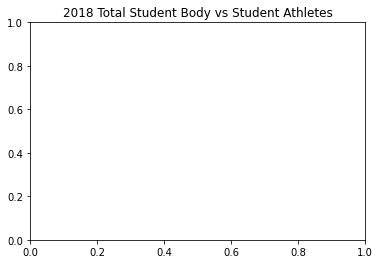

In [7]:
labels = ['Student Body', 'Student Athletes']
size = [49.80, 50.20]
plt.title('2018 Total Student Body vs Student Athletes')
plot = fed_rate_df.plot.pie(autopct="%1.1f%%")
plt.show()

In [ ]:
# Geographical representation of schools by APR score